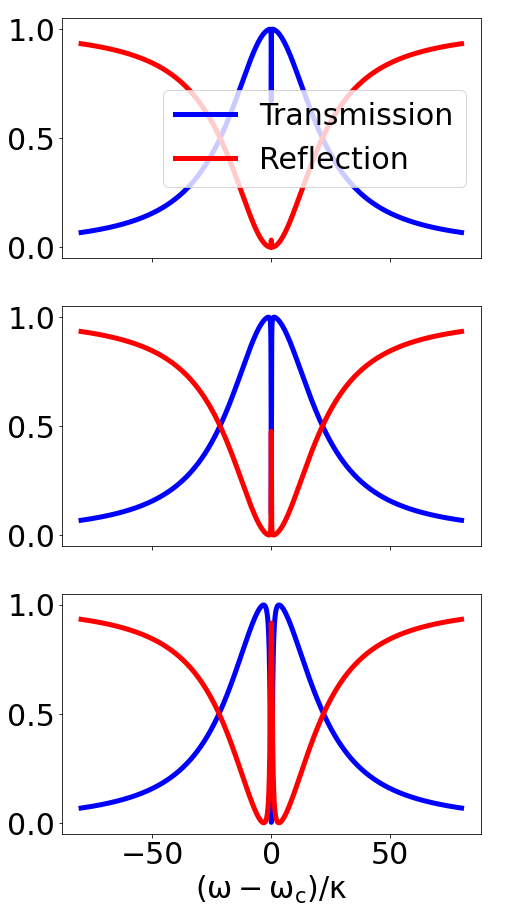

In [3]:
# First Photon Subspace, number of emitters

from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np
import time

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['g'] = 0.32  # rabi frequency
sim_params['gamma']  = 0.043 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 0     # emitter detuning
sim_params['J']  = 0     # dipole-dipole coupling  


fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(7.5, 15))

n_list = [1, 10, 100]
for i in range(len(n_list)):
    sim_params['N']  = n_list[i]
    jvec = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))   
    sim_params['jvec']  = jvec      
    sim_params['We']    = sim_params['we']*np.ones((1,sim_params['N']))
    pt1 = PhotonTransmission(plot_params, sim_params)
    x, y1, y2 = pt1.calc_first_subspace()
    axs[i].plot(np.transpose(x), y1, 'b', label='Transmission', linewidth=5)
    axs[i].plot(x, y2, 'r', label='Reflection', linewidth=5)

axs[0].legend()
fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'mathtext.default':  'regular' })

plt.xlabel('$(\omega-\omega_{c})/\kappa$')
# plt.ylabel('Transmission')
plt.savefig('verif_first_n.svg')

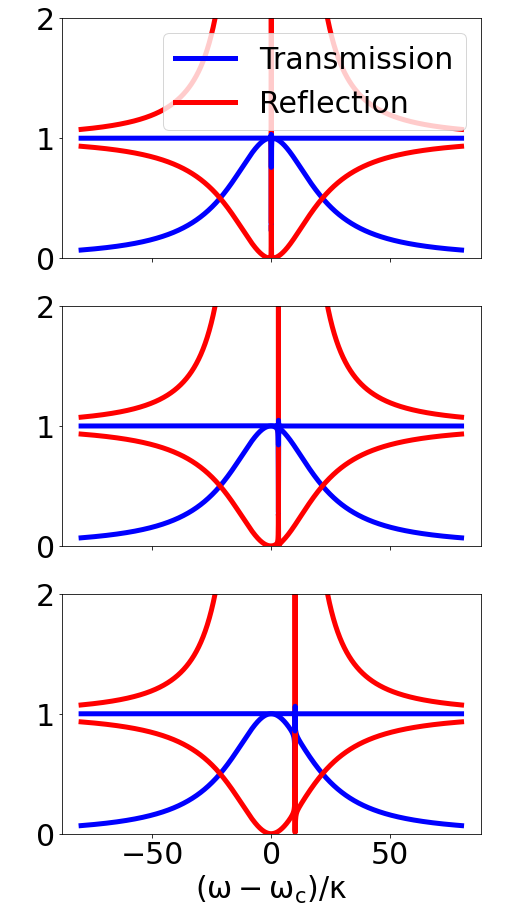

In [6]:
# Second Photon Subspace, Detuning

from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

sim_params['N'] = 5
sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['g'] = 0.32  # rabi frequency
sim_params['gamma']  = 0.043 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 0     # emitter detuning
jvec = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))   
sim_params['jvec']  = jvec      
sim_params['We']    = sim_params['we']*np.ones((1,sim_params['N']))


fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(7.5, 15))

we_list = [0, 3, 10]
for i in range(len(we_list)):
    sim_params['we'] = we_list[i]     # emitter detuning
    pt1 = PhotonTransmission(plot_params, sim_params)
    x, y1, y2, y3, y4 = pt1.calc_second_subspace()
    axs[i].plot(x, y1, 'b', label='Transmission', linewidth=5)
    axs[i].plot(x, y2, 'r', label='Reflection', linewidth=5)
    axs[i].plot(x, y4, 'r', linewidth=5)
    axs[i].plot(x, y3, 'b'\, linewidth=5)
    axs[i].set_ylim([0,2])

axs[0].legend()
fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'mathtext.default':  'regular' })

plt.xlabel('$(\omega-\omega_{c})/\kappa$')
# plt.ylabel('Transmission')
plt.savefig('verif_second_we.svg')

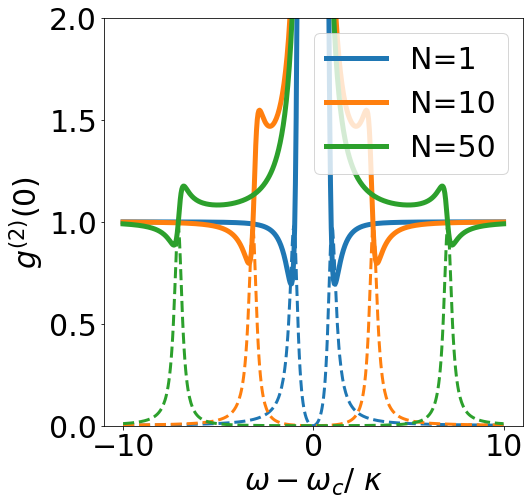

In [2]:
# Second Photon Subspace, Second Order Correlation, number of emitters

from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -10
plot_params['lim2'] = 10
plot_params['wnum'] = 500
plot_params['time_val'] = 0

sim_params['k']  = 1    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['g'] = 1  # rabi frequency
sim_params['gamma']  = 0.01 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 0     # emitter detuning
sim_params['J']  = 0     # dipole-dipole coupling  

# fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15))
plt.figure(figsize=(7.5,7.5))
n_list = [1, 10, 50]
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i in range(len(n_list)):
    sim_params['N']  = n_list[i]
    sim_params['jvec'] = np.zeros(int((n_list[i]-1)*n_list[i]/2))
    sim_params['We'] = sim_params['we']*np.ones((1,n_list[i]))
    pt1 = PhotonTransmission(plot_params, sim_params)
    x, y1, y2, y3, y4 = pt1.calc_second_subspace()
    # axs[i].plot(x, y1, 'b')
    # axs[i].plot(x, y2, 'r')
    plt.plot(x, y3, color=colors[i], label='N='+str(n_list[i]), linewidth=5)
    plt.plot(x, y1, color=colors[i], linestyle='--', linewidth=3)
    plt.ylim(top=2)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=0)  
    # axs[i].plot(x, y4, 'k')
    # plt.set_ylim([0,3])
    
plt.rcParams.update({'font.size': 30})
plt.ylabel('$g^{(2)}(0)$')
plt.xlabel('$\omega-\omega_{c}$/ $\kappa$')
plt.legend()
plt.savefig('verif_second_g2.svg')

[3.49591037e-08 2.73940900e-08 3.33026396e-08 ... 4.65531892e-08
 1.82197953e-08 5.26754739e-08] [-0.38989392 -0.92878267 -0.35471105 ...  0.39219458  0.12604879
  0.3630109 ] [9.55218859e-04 5.54138867e-05 9.61233378e-05 ... 5.41461915e-04
 1.76629893e-04 6.50214638e-04]


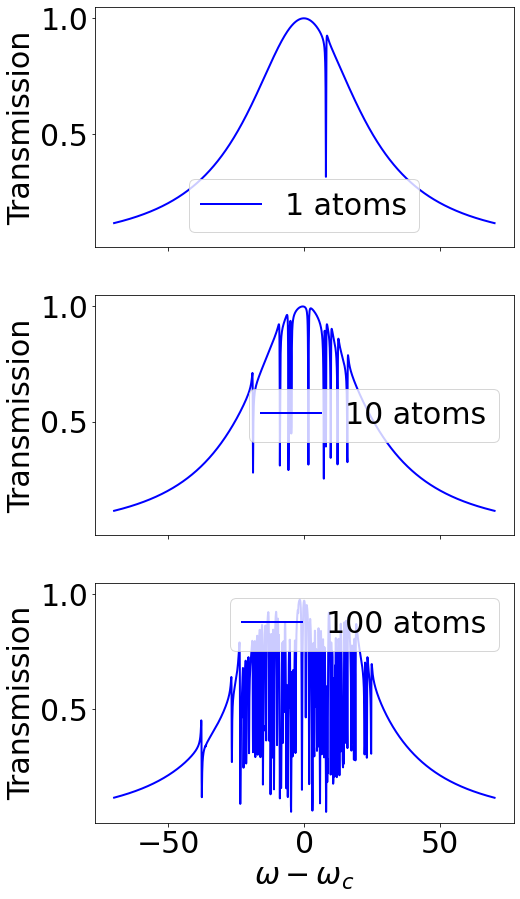

In [13]:
# First Photon Subspace Inhomogenous Broadening/dipole-dipole interactions
import xlrd
import numpy as np
import torch
from calcD import calc_D
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt

u = 1.96*3.33e-30;  #2 Debye into SI units
lmbda = 2.9e-6;    #2.9 um wavelength
c = 3e8;            #speed of light
w = 2*np.pi*c/lmbda;  #get angular frequency
hb = 1.054e-34;     #hbar
eo = 8.854e-12;     #permittivity of free space
er = 11.7;          #relative permittivity of silicon
refractive_index = np.sqrt(er);       #get refractive index of Si

g = 0.1
x = np.random.normal(0, 10e-9, 200)
y = np.random.normal(0, 10e-9, 200)
z = np.random.normal(0, 10e-9, 200)
We = np.random.normal(0, g*117, 200)

d, costheta, lw_overlap = calc_D(x, y, z, We, g)

# print(d)
# print(costheta)
# print(np.sort(lw_overlap))

val1 = u**2/(4*np.pi*eo)
val2 = (1-3*np.power(costheta,2))*6.2e18*1e6
J1 = 0*np.divide(val1, np.power(d,3))*val2
J2 = lw_overlap*np.divide(val1, np.power(d,3))*val2
J3 = np.divide(val1, np.power(d,3))*val2
print(d, costheta, lw_overlap)
J = np.array(([np.transpose(J1), np.transpose(J2)]))
# print(J)
# print(J[1,:])

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -70
plot_params['lim2'] = 70
plot_params['wnum'] = 2000
plot_params['time_val'] = 0

sim_params['k']  = 50    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['g'] = 1 # rabi frequency
sim_params['gamma']  = g # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 0     # emitter detuning
sim_params['We'] = We

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(7.5, 15))

n_list = [1,10,100]
for i in range(len(n_list)):
    for j in range(1,2):
        sim_params['N']  = n_list[i]
        # print(int((n_list[i]-1)*n_list[i]/2))
        sim_params['jvec'] = J[j,0:int((n_list[i]-1)*n_list[i]/2)]
        pt1 = PhotonTransmission(plot_params, sim_params)
        x, y1, y2 = pt1.calc_first_subspace()
        axs[i].plot(np.transpose(x), y1, 'b', label=str(n_list[i])+' atoms', linewidth=2)
        axs[i].set_ylabel('Transmission')

    axs[i].legend()
        # axs[i][j].plot(x, y2, 'r')

plt.rcParams.update({'font.size': 30})
plt.xlabel('$\omega-\omega_{c}$')
plt.savefig('verif_dipole.svg')